In [29]:
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
from decimal import Decimal
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [30]:
data=[]
with open('/content/ecg.csv', 'r') as file: #we have sent you the data we used please change the path to the data path on your computer
    reader = csv.reader(file)
    for row in reader:
        data.append(row)
data = np.array(data)
np.random.shuffle(data)

In [31]:
splitIndex = int(len(data)*0.9)

value = data[ : , :-1].astype(float)
label = data[ : , -1].astype(float).astype(int)


In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((140, )),
    tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis=-1)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=2, strides=2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 140, 1)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 136, 32)           192       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 68, 32)           0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)               

In [27]:
history = model.fit(
    value,
    label,
    epochs=20,
    validation_split=0.1,
    verbose=2,
)

Epoch 1/20
141/141 - 2s - loss: 0.0735 - accuracy: 0.9767 - val_loss: 0.1656 - val_accuracy: 0.9660 - 2s/epoch - 15ms/step
Epoch 2/20
141/141 - 1s - loss: 0.0380 - accuracy: 0.9909 - val_loss: 0.0513 - val_accuracy: 0.9900 - 1s/epoch - 8ms/step
Epoch 3/20
141/141 - 1s - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.0277 - val_accuracy: 0.9960 - 1s/epoch - 9ms/step
Epoch 4/20
141/141 - 1s - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0133 - val_accuracy: 0.9960 - 1s/epoch - 10ms/step
Epoch 5/20
141/141 - 1s - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.0360 - val_accuracy: 0.9880 - 1s/epoch - 9ms/step
Epoch 6/20
141/141 - 1s - loss: 0.0182 - accuracy: 0.9953 - val_loss: 0.0077 - val_accuracy: 0.9980 - 1s/epoch - 9ms/step
Epoch 7/20
141/141 - 1s - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.0105 - val_accuracy: 0.9940 - 1s/epoch - 9ms/step
Epoch 8/20
141/141 - 1s - loss: 0.0208 - accuracy: 0.9951 - val_loss: 0.0118 - val_accuracy: 0.9940 - 1s/epoch - 9ms/step
Epoch 9/20
141/141 - 1

<Figure size 432x288 with 0 Axes>

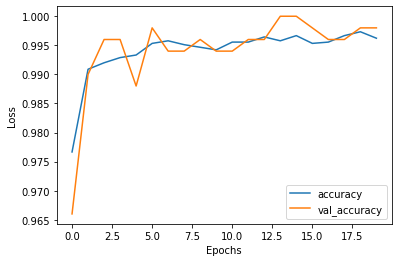

<Figure size 432x288 with 0 Axes>

In [28]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(range(len(history.history["accuracy"])), accuracy, '-')
plt.plot(range(len(history.history["val_accuracy"])), val_accuracy, '-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["accuracy","val_accuracy"])
plt.figure()